In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


# Exploratory Data Analysis

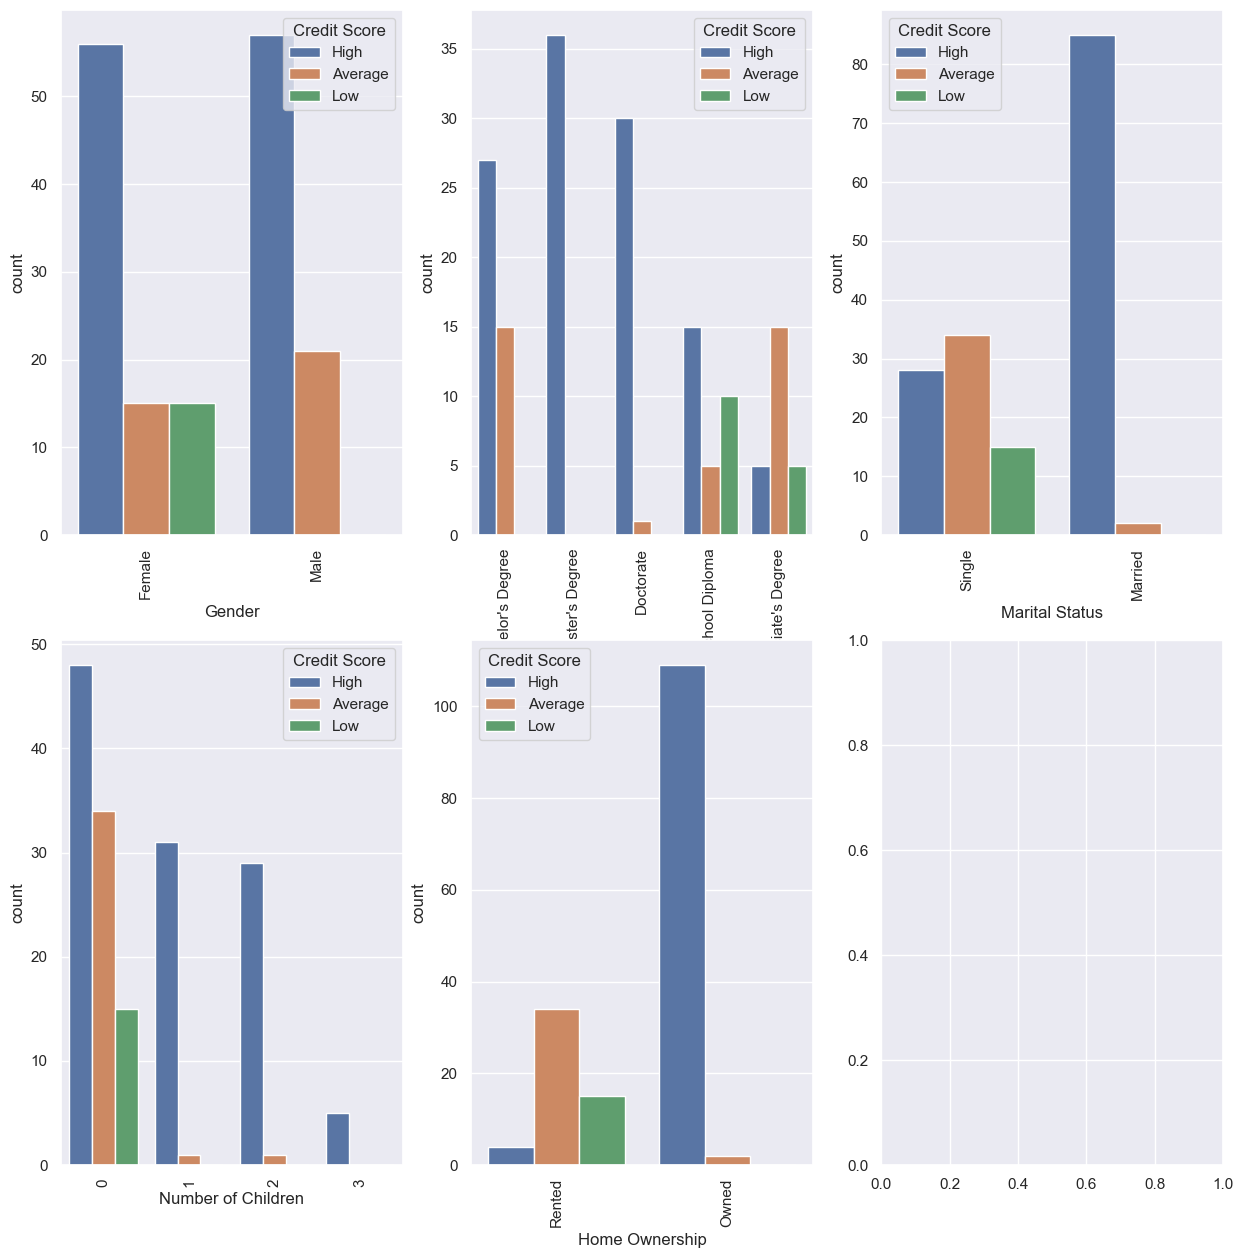

In [4]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Credit Score', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

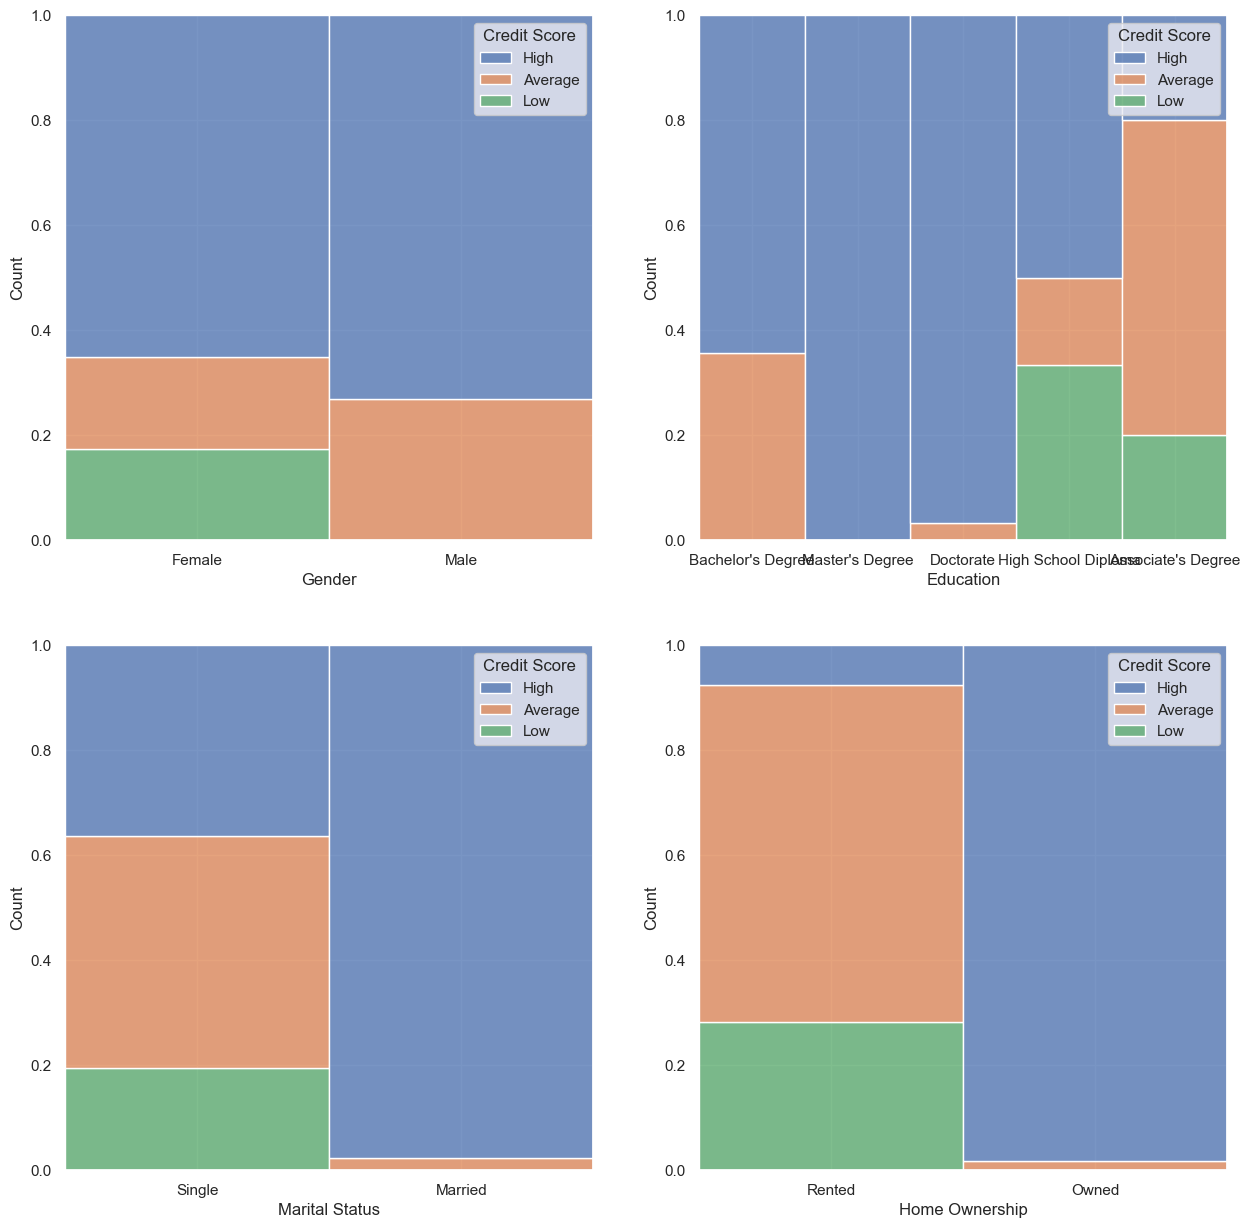

In [5]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Credit Score', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True)

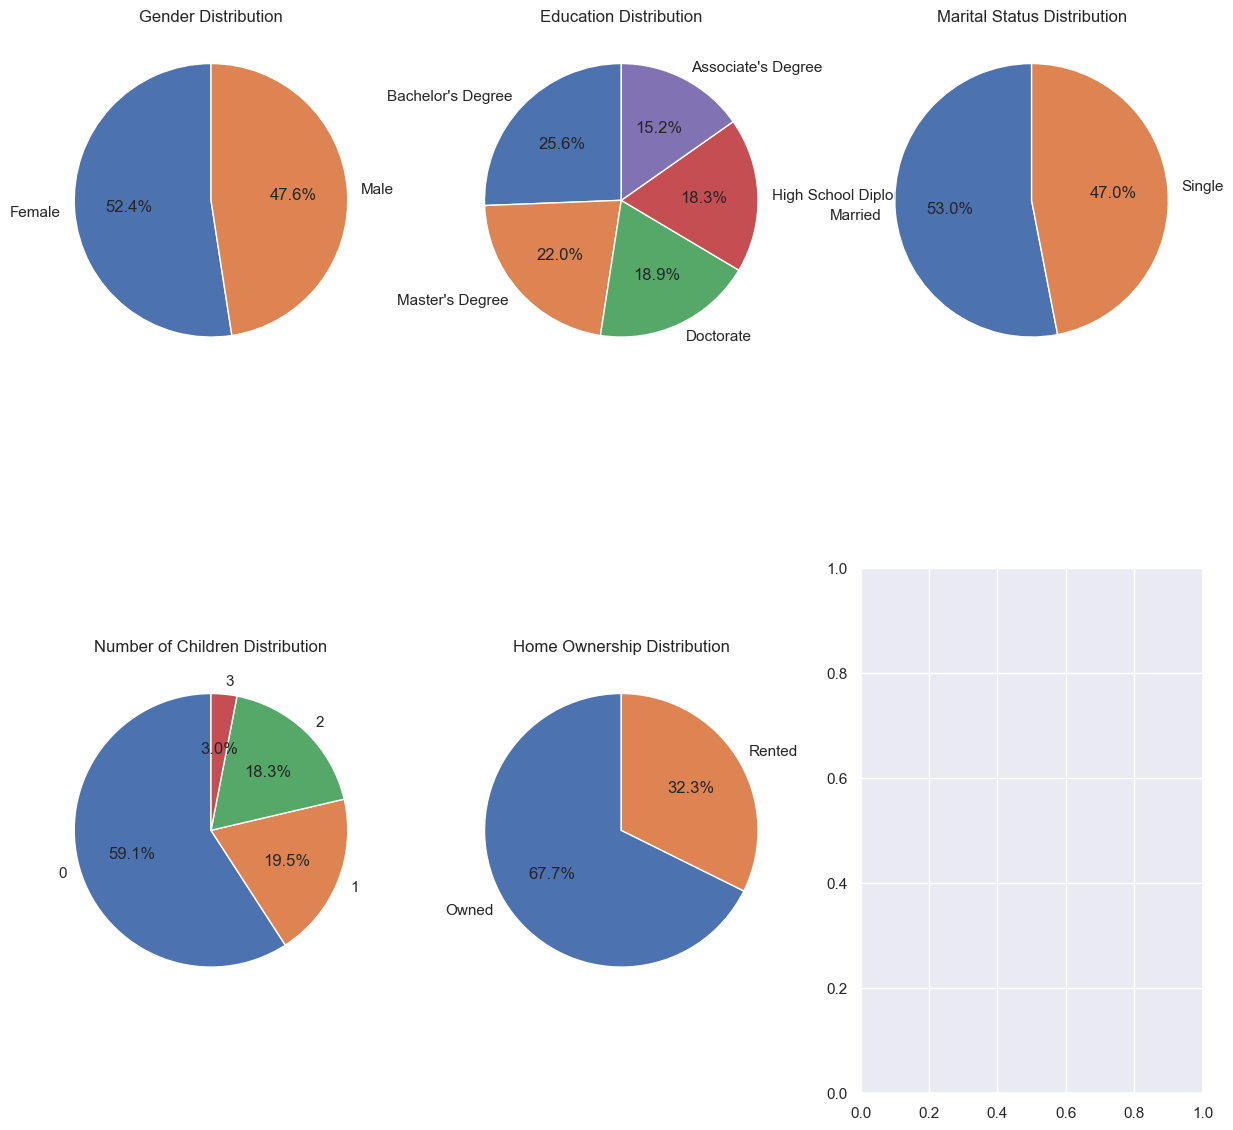

In [6]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

<AxesSubplot: xlabel='Income', ylabel='Credit Score'>

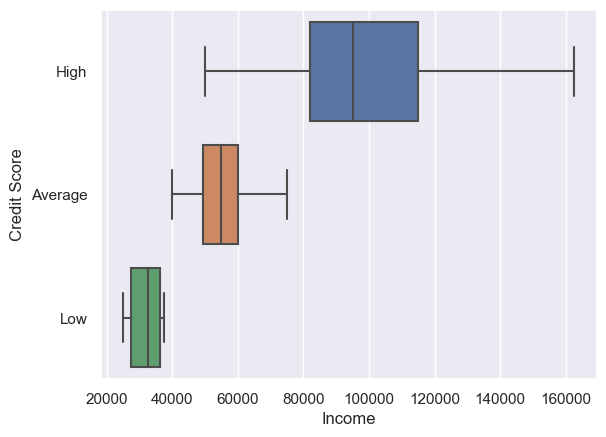

In [7]:
num_vars = ['Age', 'Income']
sns.boxplot(x='Income', data=df, y='Credit Score')


<AxesSubplot: xlabel='Age', ylabel='Credit Score'>

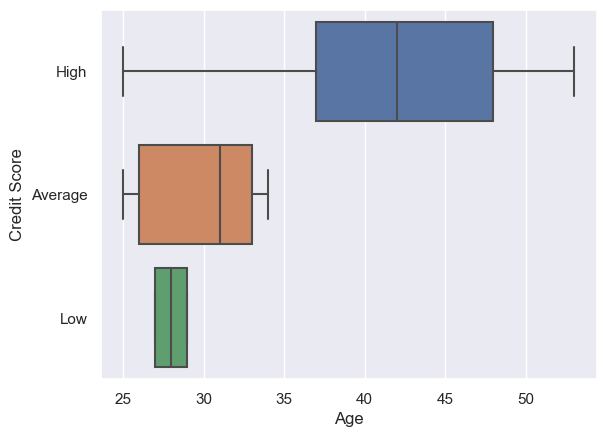

In [8]:
num_vars = ['Age', 'Income']
sns.boxplot(x='Age', data=df, y='Credit Score')

# Preprocessing
Since we have covered only binary classification models we shall stick to that.  
Dropping rows with average credit score

In [9]:
df.drop(df[(df['Credit Score']=='Average')].index,inplace=True)

In [23]:
df = pd.get_dummies(df)

In [54]:
df

,Age,Income,Number of Children,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit Score_High,Credit Score_Low
2,35,75000,1,1,0,0,0,1,0,0,1,0,1,0,1,0
3,40,125000,0,0,1,0,0,0,1,0,0,1,1,0,1,0
4,45,100000,3,1,0,0,1,0,0,0,1,0,1,0,1,0
5,50,150000,0,0,1,0,0,0,0,1,1,0,1,0,1,0
8,36,80000,2,1,0,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,53,122500,0,0,1,1,0,0,0,0,1,0,1,0,1,0
159,29,27500,0,1,0,0,0,0,1,0,0,1,0,1,0,1
161,39,62500,2,1,0,0,1,0,0,0,1,0,1,0,1,0
162,44,87500,0,0,1,0,0,0,0,1,0,1,1,0,1,0


In [68]:
from sklearn.preprocessing import StandardScaler
df.drop(['Home Ownership_Rented','Credit Score_Low'], axis=1, inplace=True)

In [69]:
df

,Age,Income,Number of Children,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Home Ownership_Owned,Credit Score_High
2,35,75000,1,0,0,0,1,0,0,1,1,1
4,45,100000,3,0,0,1,0,0,0,1,1,1
5,50,150000,0,1,0,0,0,0,1,1,1,1
8,36,80000,2,0,0,0,0,0,1,1,1,1
9,41,105000,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
158,53,122500,0,1,1,0,0,0,0,1,1,1
159,29,27500,0,0,0,0,0,1,0,0,0,0
161,39,62500,2,0,0,1,0,0,0,1,1,1
162,44,87500,0,1,0,0,0,0,1,0,1,1


In [75]:
X = df.iloc[0:,0:11]

In [76]:
X

,Age,Income,Number of Children,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Home Ownership_Owned
2,35,75000,1,0,0,0,1,0,0,1,1
4,45,100000,3,0,0,1,0,0,0,1,1
5,50,150000,0,1,0,0,0,0,1,1,1
8,36,80000,2,0,0,0,0,0,1,1,1
9,41,105000,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
158,53,122500,0,1,1,0,0,0,0,1,1
159,29,27500,0,0,0,0,0,1,0,0,0
161,39,62500,2,0,0,1,0,0,0,1,1
162,44,87500,0,1,0,0,0,0,1,0,1


In [77]:
Y= df.iloc[0:,11]

In [78]:
Y

2      1
4      1
5      1
8      1
9      1
      ..
158    1
159    0
161    1
162    1
163    1
Name: Credit Score_High, Length: 125, dtype: uint8

In [80]:
X = X.to_numpy()

In [81]:
Y = Y.to_numpy()

In [82]:
X

array([[    35,  75000,      1, ...,      0,      1,      1],
       [    45, 100000,      3, ...,      0,      1,      1],
       [    50, 150000,      0, ...,      1,      1,      1],
       ...,
       [    39,  62500,      2, ...,      0,      1,      1],
       [    44,  87500,      0, ...,      1,      0,      1],
       [    49,  77500,      1, ...,      0,      1,      1]], dtype=int64)

In [86]:
X=StandardScaler().fit_transform(X)

In [100]:
len(X)

125

In [88]:
from sklearn.model_selection import train_test_split


In [147]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.6,random_state=8)

 ### Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
logr = LogisticRegression()
logr.fit(Xtrain,Ytrain)
Ypred = logr.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
acc_score = accuracy_score(Ytest,Ypred)

In [149]:
cmat

array([[11,  0],
       [ 0, 64]], dtype=int64)

In [150]:
acc_score

1.0

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)
Ypred = knn.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
acc_score = accuracy_score(Ytest,Ypred)

C:\Users\dp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [153]:
cmat

array([[11,  0],
       [ 0, 64]], dtype=int64)

In [154]:
acc_score

1.0

In [155]:
from sklearn import svm

In [156]:
clf = svm.SVC(kernel='linear',C=0.1)
clf.fit(X,Y)

SVC(C=0.1, kernel='linear')

In [157]:
Ypred = clf.predict(Xtest)
cmat = confusion_matrix(Ytest,Ypred)
acc_score = accuracy_score(Ytest,Ypred)

In [158]:
cmat

array([[11,  0],
       [ 0, 64]], dtype=int64)

In [159]:
acc_score

1.0